Connect Google Drive

---

We start by setting up Google Drive integration within our Google Colab

environment. Here's a breakdown of what's happening:



1.   from google.colab import drive: We import the drive module from the google.colab library. Google Colab is a cloud-based Jupyter notebook environment provided by Google, and it allows us to easily access Google Drive for storing and retrieving files.

2.   drive.mount('/content/drive'): We mount (connect) our Google Drive to the Colab environment. When we run this code, it will prompt us to visit a URL and obtain an authorization code to give Colab access to our Google Drive.



*   /content/drive: This is the directory in the Colab environment where our Google
Drive will be mounted. We can choose a different location if needed.
*   After entering the authorization code, our Google Drive will be mounted, and we'll have access to its contents within our Colab environment.


This section is typically used when we need to access datasets or files stored in our Google Drive and want to work with them in a Colab notebook. It simplifies the process of reading and writing files from and to our Google Drive.

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image Data Preprocessing

---

This section of our code responsible for loading image data from a specified directory path, resizing the images, and preparing the data for logistic regression analysis.

This code segment loads image data, resizes it, and prepares it for use in logistic regression analysis. It assumes that we have organized your image data into subdirectories, each representing a different class or category of images.

In [ ]:
import os #provides functions for interacting with the operating system, such as listing directory contents.
import re
import glob #used for pattern matching of files and directories, allowing you to retrieve a list of file paths matching a specified pattern.
import cv2 #This line imports the OpenCV library, which is commonly used for computer vision tasks, including image loading, resizing, and manipulation.
import numpy as np #Imports the NumPy library for numerical operations

# Manually set the directory path where our images are stored
path = '/content/drive/MyDrive/Minor/Data mining/chest-xray/'

# List the subdirectories in the specified path
dirs = os.listdir(path)

label = 0

#Initialize empty lists X and y to store image data and corresponding labels.
X = []
y = []
im_arr = []  #Initializes an empty list im_arr to store dictionaries containing image data for each class. This is used to sample the first 10 images per class.

for i in dirs: #The outer loop iterates over the subdirectories in dirs, representing different classes of images.
    count = 0
    for pic in glob.glob(os.path.join(path, i, '*')): #The inner loop uses glob.glob to retrieve a list of file paths for images in each class
        im = cv2.imread(pic) #Reads an image from the file path specified by pic using OpenCV's imread function.
        if im is None:
            print("Failed to load image:", pic)
            continue

        im = cv2.resize(im, (70, 70)) # Resizes the loaded image to a specified size of 70x70 pixels. This step ensures that all images have the same dimensions.
        im = np.array(im) #Converts the image to a NumPy array, making it suitable for further processing.
        count += 1
        X.append(im) #Appends the image data (im) to the X list and the corresponding label (label) to the y list.
        y.append(label)

        # Sample only the first 10 images per category
        if count <= 10:
            im_arr.append({str(i): im})

    print("Number of " + str(i) + " sample: " + str(count))
    label += 1

X = np.array(X)
y = np.array(y)

Number of NORMAL sample: 234
Number of PNEUMONIA sample: 390


Image Visualization

---

This section of your code is responsible for displaying a grid of images for visualization purposes. It uses the Matplotlib library to create a grid of subplots and then populates these subplots with images from the im_arr list

This code segment creates a grid of subplots and populates them with images from the im_arr list, making it easy to visualize the sampled images from different classes. The layout is set up to have 3 rows and 7 columns of subplots, but you can adjust the grid size as needed for your visualization.

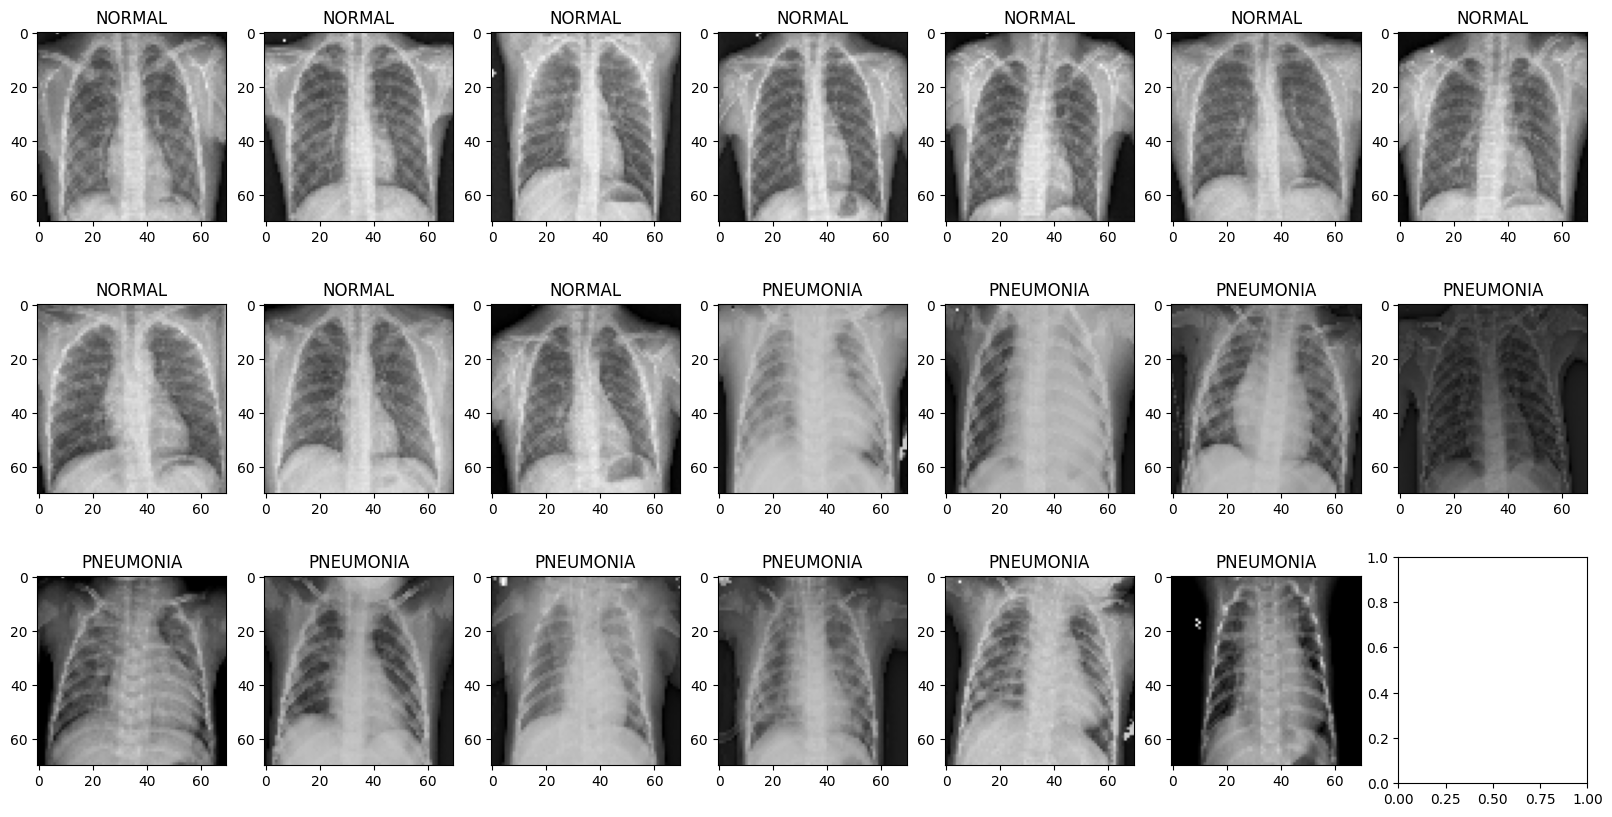

In [ ]:
import matplotlib.pyplot as plt

#Creates a figure (fig) and a grid of subplots (axs). This line specifies that you want a grid with 3 rows and 7 columns of subplots.
#The figsize parameter sets the size of the entire figure to be 20 units wide and 10 units tall.
fig, axs = plt.subplots(3, 7, figsize=(20, 10))

#Initialize variables cnt, row, and col to keep track of the current subplot being filled.
cnt = 0
row = 0
col = 0


for i in im_arr: #The outer loop iterates over the dictionaries in im_arr, each containing image data and class names.
    for key, value in i.items(): #The inner loop extracts the key (class name) and value (image data) from each dictionary.
        if(cnt==7): #Checks if cnt (the number of subplots filled in the current row) reaches 7. If so, it increments the row variable, resets col to 0, and resets cnt to 0, effectively moving to the next row of subplots.
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()



Import Libraries and Prepare Data

---

This section of code focuses on importing necessary libraries, loading image data from a dataset directory, and preparing the data for further processing, including splitting it into training and testing sets.

This code section is crucial for data preparation, as it loads images, assigns labels, and splits the data into training and testing sets, setting the stage for further analysis and model development.

In [ ]:
# Import the necessary libraries
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# Define the dataset directory
data_dir = "/content/drive/MyDrive/Minor/Data mining/chest-xray"

# Define the class/category labels
categories = ["NORMAL", "PNEUMONIA"]

# Initialize lists to store image data and labels
X = []  # This list will store the image data
y = []  # This list will store the corresponding category labels

# Loop through each category
for category in categories:
    category_dir = os.path.join(data_dir, category)
    for filename in os.listdir(category_dir):
        image_path = os.path.join(category_dir, filename)
        image = Image.open(image_path)  # Open the image using PIL
        X.append(np.array(image))  # Convert the image into a numpy array
        y.append(category)  # Store the label/category

# Convert the lists into numpy arrays
X = np.array(X)
y = np.array(y)

# PREPROCESSING
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Convert data type and scale between 0 and 1 if needed

<ipython-input-4-3de8f8ef8ff7>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


This section of code below handles image preprocessing, including resizing images, splitting data into training and testing sets, converting labels to categorical binary, and creating low-resolution (LR) and high-resolution (HR) versions of the images.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage.transform import resize

# Define the directory where your image files are located
data_dir = "/content/drive/MyDrive/Minor/Data mining/chest-xray"

# Define the image dimensions (height and width)
height = 70
width = 70

# Define the list to store image data and labels
X = []
y = []

# Define the categories (class labels)
categories = ["NORMAL", "PNEUMONIA"]

# Load and preprocess images
for category in categories:
    category_dir = os.path.join(data_dir, category)
    label = categories.index(category)  # Assign a numerical label to each category
    for filename in os.listdir(category_dir):
        image_path = os.path.join(category_dir, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (height, width))
        image = image.astype('float32') / 255.0
        X.append(image)
        y.append(label)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Convert labels to categorical binary: [1 0] = 0, [0 1] = 1
y_train = to_categorical(y_train, len(categories))
y_test = to_categorical(y_test, len(categories))

# Create low-resolution (LR) version of the images
def create_low_resolution_images(images, scale_factor):
    lr_images = np.array([resize(img, (img.shape[0] // scale_factor, img.shape[1] // scale_factor), preserve_range=True, anti_aliasing=True) for img in images])
    return lr_images

# Create high-resolution (HR) version of the images using interpolation
def create_high_resolution_images(images, scale_factor):
    hr_images = np.array([resize(img, (img.shape[0] * scale_factor, img.shape[1] * scale_factor), preserve_range=True, anti_aliasing=True) for img in images])
    return hr_images

# Define the scale factor for low and high resolution
lr_scale_factor = 4  # Set the scale factor for low resolution
hr_scale_factor = 2  # Set the scale factor for high resolution

# Create low-resolution and high-resolution images
X_train_lr = create_low_resolution_images(X_train, lr_scale_factor)
X_train_hr = create_high_resolution_images(X_train, hr_scale_factor)
X_test_lr = create_low_resolution_images(X_test, lr_scale_factor)
X_test_hr = create_high_resolution_images(X_test, hr_scale_factor)

# Print the shape of the data for verification
print("X_train_lr shape:", X_train_lr.shape)
print("X_train_hr shape:", X_train_hr.shape)
print("X_test_lr shape:", X_test_lr.shape)
print("X_test_hr shape:", X_test_hr.shape)


X_train_lr shape: (418, 17, 17, 3)
X_train_hr shape: (418, 140, 140, 3)
X_test_lr shape: (206, 17, 17, 3)
X_test_hr shape: (206, 140, 140, 3)



---

**Neural Network Model with Keras and k-fold Cross-Validation**

This code demonstrates the process of creating a neural network model for a binary classification task using the Keras library and then evaluating the model's performance using k-fold cross-validation. The code is structured as follows:

1. **Importing Necessary Libraries**: The code begins by importing essential libraries and modules, including Keras for building neural networks, NumPy for numerical operations, Matplotlib for plotting, and Scikit-Learn's `StratifiedKFold` for k-fold cross-validation.

2. **Defining the Neural Network Model**: The `create_model` function defines the architecture of the neural network model. This model is a sequential model, which is a linear stack of layers. The architecture includes:
   - Two convolutional layers with ReLU activation.
   - Two max-pooling layers to reduce spatial dimensions.
   - Two dropout layers to prevent overfitting.
   - A flatten layer to convert 2D feature maps to a 1D vector.
   - A fully connected (dense) layer with ReLU activation.
   - Another dropout layer.
   - An output layer with softmax activation for binary classification.

3. **Compiling and Summarizing the Model**: The `compile_and_summarize_model` function compiles the neural network model. It specifies the loss function (categorical cross-entropy), optimizer (Stochastic Gradient Descent or SGD), and evaluation metric (accuracy). It also prints a summary of the model's architecture, which includes the layers, output shape, and the number of parameters.

4. **Data Preprocessing**: Assuming that the data is loaded as `X_train` and `y_train`, the code converts one-hot encoded labels to categorical labels using `np.argmax`. It also initializes a 5-fold stratified cross-validator using `StratifiedKFold`. This ensures that each fold maintains the class distribution of the original dataset.

5. **Training and Validation Loop**: The code enters a loop that iterates through each fold of the cross-validation. For each fold:
   - A new instance of the neural network model is created.
   - The model is compiled and summarized using the `compile_and_summarize_model` function.
   - The training and validation data for the current fold are extracted from the dataset.
   - The model is trained using the training data, and validation data are used for monitoring model performance during training.
   - The validation accuracy history is plotted to visualize the training progress for the current fold.

6. **Storing Validation Accuracy**: The validation accuracy of the current fold is stored in the `val_acc_per_fold` list, which will be used to calculate the average validation accuracy over all folds.

7. **Printing Average Validation Accuracy**: Finally, the code prints the average validation accuracy over all folds, providing an overall assessment of the model's performance across different subsets of the data.

In summary, this code segment outlines the complete workflow for building a neural network model, performing k-fold cross-validation to assess its performance, and visualizing the training progress for each fold. It is a comprehensive approach to ensure robust model evaluation and validation.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0

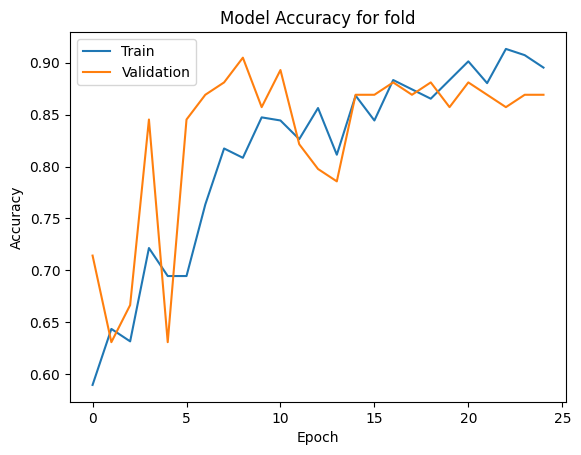

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)             

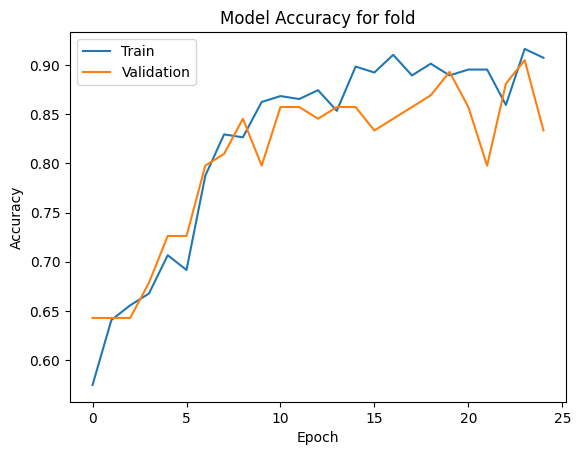

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)             

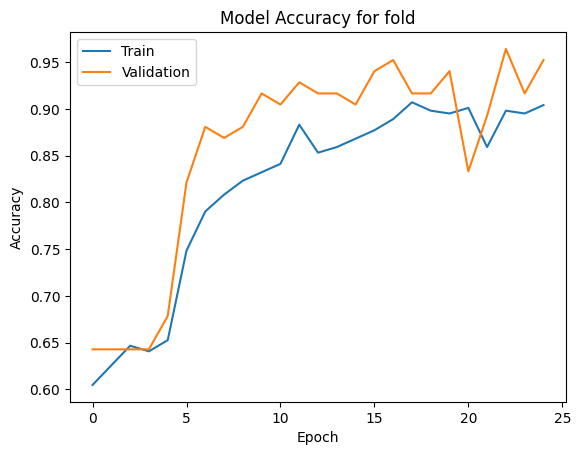

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)             

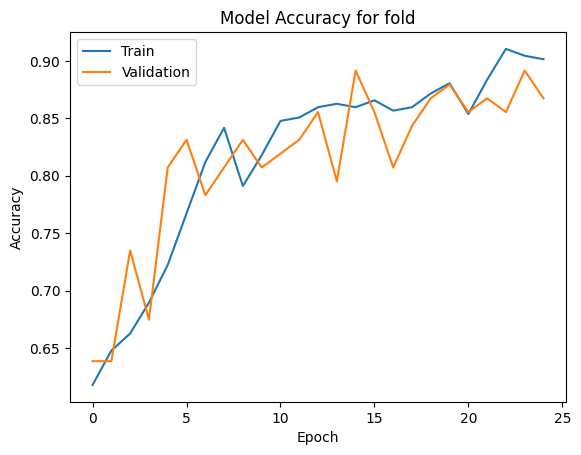

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)             

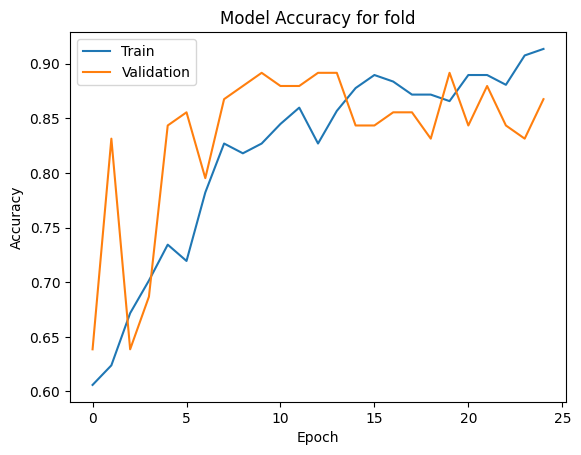

Average validation accuracy over 5 folds: 0.8779


In [ ]:
# Import necessary libraries and modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Define a function to create the neural network model
def create_model():
    model = Sequential()  # Initialize a sequential model (a linear stack of layers)

    # Layer 1: Convolutional Layer with 32 filters, each of size (3, 3), and ReLU activation
    # Input shape: (70, 70, 3) for images of height 70, width 70, and 3 color channels (RGB)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 3)))

    # Layer 2: Max Pooling Layer with a pool size of (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3: Convolutional Layer with 32 filters, each of size (3, 3), and ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu'))

    # Layer 4: Max Pooling Layer with a pool size of (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 5: Dropout Layer with a dropout rate of 25%
    model.add(Dropout(0.25))

    # Layer 6: Flatten Layer to convert the 2D feature maps to a 1D vector
    model.add(Flatten())

    # Layer 7: Fully Connected (Dense) Layer with 128 units and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Layer 8: Dropout Layer with a dropout rate of 50%
    model.add(Dropout(0.5))

    # Layer 9: Output Layer with 2 units (for binary classification) and softmax activation
    model.add(Dense(2, activation='softmax'))
    return model

# Define a function to compile and summarize the model
def compile_and_summarize_model(model):
    epochs = 25  # Number of times the entire training dataset will be processed by the model during training

    learning_rate = 0.01  # Step size at which the model's weights are updated during training

    momentum = 0.9  # Momentum is a technique used to accelerate convergence and reduce oscillations during training

    # Create an instance of the SGD optimizer with specified learning rate, momentum, and nesterov
    sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)

    # Compile the model with categorical cross-entropy loss and the SGD optimizer
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # Print a summary of the model architecture
    print(model.summary())
    return model, epochs

# Assuming your data is loaded as X_train and y_train
y_train_labels = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to categorical labels
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Create a 5-fold stratified cross-validator

val_acc_per_fold = []  # List to store validation accuracy for each fold

# Loop through folds and train the model
for train_indices, val_indices in kfold.split(X_train, y_train_labels):
    model = create_model()  # Create a new model for each fold
    model, epochs = compile_and_summarize_model(model)  # Compile and summarize the model

    cur_X_train, cur_X_val = X_train[train_indices], X_train[val_indices]  # Split data for the current fold
    cur_y_train, cur_y_val = y_train[train_indices], y_train[val_indices]

    # Training the model for the current fold
    history = model.fit(cur_X_train, cur_y_train, validation_data=(cur_X_val, cur_y_val), epochs=epochs, batch_size=32)

    # Store the validation accuracy of the current fold
    val_acc_per_fold.append(history.history['val_accuracy'][-1])

    # Plot training & validation accuracy for the current fold
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy for fold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Print the average validation accuracy over all folds
print(f"Average validation accuracy over {kfold.get_n_splits()} folds: {np.mean(val_acc_per_fold):.4f}")


In [ ]:
#PREDICTION
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 34ms/step


the code below snippet is converting one-hot encoded predictions and ground truth labels (where each class is represented by a binary value) into class indices (integers representing the predicted or actual class). This conversion can be useful for various evaluation and analysis tasks when working with classification models.

In [ ]:
# Initialize empty lists to store converted predictions and ground truth labels
y_prediction_n = []
y_test_n = []

# Iterate through the predictions and ground truth labels
for i in range(0, len(y_pred)):
    # Find the index of the maximum value in the prediction and ground truth arrays
    max_n = max(y_pred[i])
    max_m = max(y_test[i])

    # Create lists of indices where the maximum values occur
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]

    # Append the index of the maximum value to the converted lists
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)


In [ ]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["PNEUNOMIA","NORMAL"]))

              precision    recall  f1-score   support

   PNEUNOMIA       0.91      0.73      0.81        83
      NORMAL       0.84      0.95      0.89       123

    accuracy                           0.86       206
   macro avg       0.88      0.84      0.85       206
weighted avg       0.87      0.86      0.86       206



The provided code below is used to generate a classification report, create a heatmap visualization of the report, and display it using Seaborn and Matplotlib

this code generates a classification report that includes metrics such as precision, recall, F1-score, and support for each class ("PNEUMONIA" and "NORMAL"). It then creates a heatmap visualization of the report, making it easier to interpret and compare the performance metrics for the different classes.

              precision     recall   f1-score     support
PNEUMONIA     91.044776  73.493976  81.333333   83.000000
NORMAL        84.172662  95.121951  89.312977  123.000000
accuracy      86.407767  86.407767  86.407767   86.407767
macro avg      0.876087   0.843080   0.853232  206.000000
weighted avg   0.869415   0.864078   0.860979  206.000000


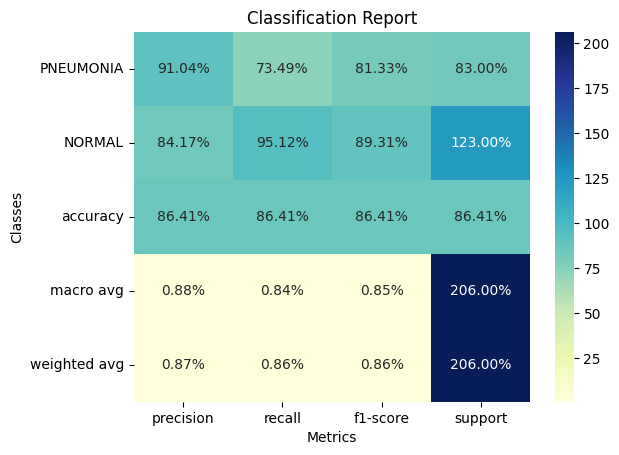

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(y_test_n, y_prediction_n, target_names=["PNEUMONIA","NORMAL"], output_dict=True)

# Convert relevant values to percentages
for key in report:
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        report[key]['precision'] *= 100
        report[key]['recall'] *= 100
        report[key]['f1-score'] *= 100
report['accuracy'] *= 100

# Convert report to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

print(report_df)

# Create a heatmap from the classification report
heatmap = sns.heatmap(report_df, cmap="YlGnBu", annot=True, fmt=".2f")

# Modify annotations to add percentage symbol
for text in heatmap.texts:
    text.set_text(text.get_text() + '%')

# Set plot properties
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show the plot
plt.show()
